<a href="https://colab.research.google.com/github/sebcalcagno/AnalisisSeriesTemporales/blob/main/CLASE_6/AST_Clase_6_ejercicio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelo VAR

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools as tsa
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def test_stationarity(timeseries):

    #Rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 6))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

In [ ]:
url='https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/indices-precios-internacionales-productos-basicos-mensual.csv'
serie = pd.read_csv(url, index_col='indice_tiempo', parse_dates=True)
serie = serie.asfreq('MS') 
serie_indice = pd.read_csv(url, parse_dates=True)

In [ ]:
serie.head()

,trigo,maiz,arroz,cebada,poroto_soja,harina_soja
indice_tiempo,,,,,,
1980-01-01,175.634750,105.506813,395.0,66.584538,238.766037,201.756039
1980-02-01,172.695236,114.167831,399.0,66.584538,241.361320,198.261712
1980-03-01,163.509323,109.837318,415.0,69.897836,227.075780,186.103218
1980-04-01,156.528030,108.262604,419.0,69.897836,218.210476,181.197933
1980-05-01,161.304703,109.837318,433.0,68.241187,225.904457,187.392923


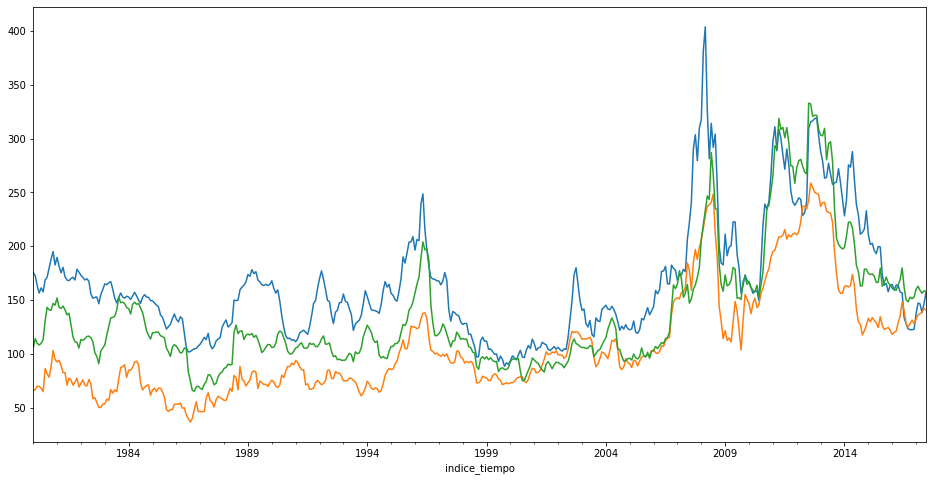

In [ ]:
serie.trigo.plot(figsize=(16,8));
serie.cebada.plot(figsize=(16,8));
serie.maiz.plot(figsize=(16,8));

# SEPARO VARIABLES A TRABAJAR

# Maiz ( no es necesario ver esta parte )

In [ ]:
maiz_ts=serie.drop(['trigo','arroz','cebada','poroto_soja','harina_soja'], axis=1)

In [ ]:
maiz_ts

,maiz
indice_tiempo,
1980-01-01,105.506813
1980-02-01,114.167831
1980-03-01,109.837318
1980-04-01,108.262604
1980-05-01,109.837318
...,...
2017-02-01,162.900000
2017-03-01,159.000000
2017-04-01,156.400000


In [ ]:
# Diferencio la serie
maiz_ts_diff=maiz_ts.copy()
maiz_ts_diff=maiz_ts_diff.diff(axis = 0, periods = 1)
maiz_ts_diff.drop(['1980-01-01'], inplace=True)

# Trigo   ( aqui ver el proceso de transformacion de box cox ) 

In [ ]:
trigo_ts=serie.drop(['maiz','arroz','cebada','poroto_soja','harina_soja'], axis=1)

In [ ]:
trigo_ts.head()

,trigo
indice_tiempo,
1980-01-01,175.634750
1980-02-01,172.695236
1980-03-01,163.509323
1980-04-01,156.528030
1980-05-01,161.304703


In [ ]:
# Diferencio la serie
trigo_ts_diff=trigo_ts.copy()
trigo_ts_diff=trigo_ts_diff.diff(axis = 0, periods = 1)
trigo_ts_diff.drop(['1980-01-01'], inplace=True)

In [ ]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# import modules
import numpy as np
from scipy import stats
 
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# get values from our "AIR_TIME" column
transform = np.asarray(trigo_ts['trigo'].values)

In [ ]:
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(transform)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


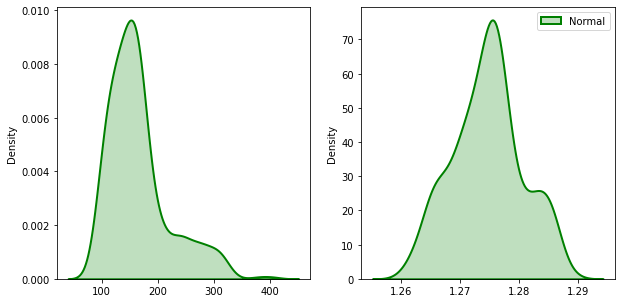

In [ ]:
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(transform, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

In [ ]:
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: -0.7680185745996299


In [ ]:
fitted_data

array([1.2774637 , 1.27714289, 1.27607499, 1.27518969, 1.27580275,
       1.27533408, 1.27668569, 1.27697885, 1.27788961, 1.27872765,
       1.27937132, 1.27818888, 1.27886664, 1.27807766, 1.27742412,
       1.27796524, 1.27702009, 1.27668569, 1.27660048, 1.27685417,
       1.27697885, 1.27668569, 1.27777514, 1.27750313, 1.27718352,
       1.27693745, 1.27668569, 1.27681229, 1.27655762, 1.27509243,
       1.27454264, 1.27464452, 1.27469513, 1.2738043 , 1.27499435,
       1.27561757, 1.27625291, 1.2761643 , 1.27638452, 1.2765146 ,
       1.27566414, 1.27454264, 1.27391257, 1.27464452, 1.27518969,
       1.27469513, 1.27454264, 1.27479572, 1.27469513, 1.27438818,
       1.27484569, 1.27528615, 1.27484569, 1.27428409, 1.27385855,
       1.27464452, 1.27499435, 1.27469513, 1.27464452, 1.27423171,
       1.2741791 , 1.27391257, 1.27358486, 1.27336146, 1.27218088,
       1.27180447, 1.27081374, 1.26974497, 1.27018245, 1.27060652,
       1.2715474 , 1.27230396, 1.27148234, 1.27101783, 1.27186

In [ ]:
trigo_ts_boxcox=pd.DataFrame(fitted_data, columns=['trigo'])

In [ ]:
trigo_ts_boxcox['indice_tiempo'] = serie_indice.indice_tiempo 
trigo_ts_boxcox

,trigo,indice_tiempo
0,1.277464,1/1/1980
1,1.277143,2/1/1980
2,1.276075,3/1/1980
3,1.275190,4/1/1980
4,1.275803,5/1/1980
...,...,...
445,1.273906,2/1/2017
446,1.273774,3/1/2017
447,1.272526,4/1/2017
448,1.273788,5/1/2017


In [ ]:
trigo_ts_boxcox.indice_tiempo = pd.to_datetime(trigo_ts_boxcox.indice_tiempo) 
trigo_ts_boxcox.set_index("indice_tiempo", inplace=True)

In [ ]:
trigo_ts_boxcox.head()

,trigo
indice_tiempo,
1980-01-01,1.277464
1980-02-01,1.277143
1980-03-01,1.276075
1980-04-01,1.275190
1980-05-01,1.275803


Dif de la transformacion de Box cox

In [ ]:
trigo_ts_boxcox_diff=trigo_ts_boxcox.copy()
trigo_ts_boxcox_diff=trigo_ts_boxcox_diff.diff(axis = 0, periods = 1)
trigo_ts_boxcox_diff.drop(['1980-02-01'], inplace=True)

KeyError: ignored

# Cebada ( no es necesario ver esta parte )

In [ ]:
cebada_ts=serie.drop(['trigo','arroz','maiz','poroto_soja','harina_soja'], axis=1)

In [ ]:
cebada_ts

,cebada
indice_tiempo,
1980-01-01,66.584538
1980-02-01,66.584538
1980-03-01,69.897836
1980-04-01,69.897836
1980-05-01,68.241187
...,...
2017-02-01,136.200000
2017-03-01,137.300000
2017-04-01,138.800000


In [ ]:
# Diferencio la serie
cebada_ts_diff=cebada_ts.copy()
cebada_ts_diff=cebada_ts_diff.diff(axis = 0, periods = 1)
cebada_ts_diff.drop(['1980-01-01'], inplace=True)

# ANALISIS DE ESTACIONARIEDAD

Fuente = https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html <br>
Codigo= statsmodels.tsa.stattools.adfuller(serie.maiz, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

Variables para realizar los diferentes test de raices unitarias= 

<ol>

<li>“c” : constant only (default)</li>

<li>“ct” : constant and trend</li>

<li>“ctt” : constant, and linear and quadratic trend</li>

<li>“nc” : no constant, no trend</li>

</ol>

# Maiz

Primero analizamos serie original - MAIZ -

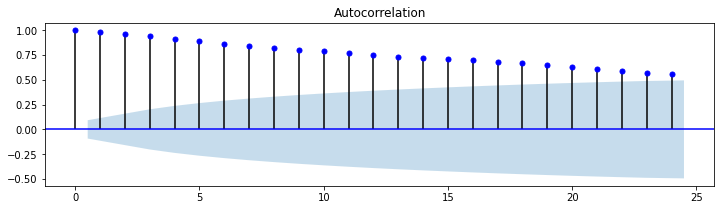

In [ ]:
acf_plot = plot_acf(maiz_ts, lags=24,  color= 'blue')
acf_plot.set_size_inches(12,3)

In [ ]:
# test DICKEY-FULLER
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(serie.maiz, regression='nc',autolag='AIC') 

(-0.7006273025487203,
 0.4123458706893232,
 16,
 433,
 {'1%': -2.5709228555275243,
  '10%': -1.6162207681657739,
  '5%': -1.9416378864437647},
 3130.458609577689)

In [ ]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(serie.maiz, regression='c',autolag='AIC')

(-2.1500183335277865,
 0.22488307338672459,
 16,
 433,
 {'1%': -3.445542818501549,
  '10%': -2.5703378690483176,
  '5%': -2.868238133603207},
 3128.1145793319424)

In [ ]:
# Incluya ambos términos (“Trend”)
tsa.adfuller(serie.maiz, regression='ct',autolag='AIC')

(-2.9323712995441586,
 0.15197988628737646,
 16,
 433,
 {'1%': -3.9798311295958153,
  '10%': -3.133042572822471,
  '5%': -3.420678245656216},
 3126.1216090615862)

Ánalisis de la serie original diferenciada - MAIZ -

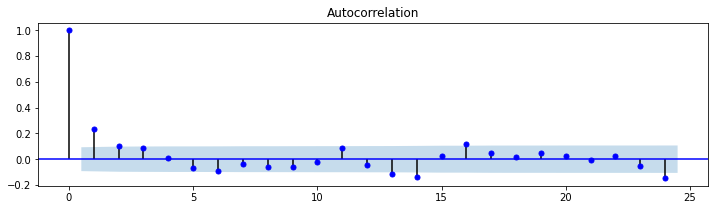

In [ ]:
acf_plot = plot_acf(maiz_ts_diff, lags=24,  color= 'blue')
acf_plot.set_size_inches(12,3)

In [ ]:
# test DICKEY-FULLER
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(maiz_ts_diff.maiz, regression='nc',autolag='AIC') 

(-4.98222450069633,
 1.1451336840198056e-06,
 15,
 433,
 {'1%': -2.5709228555275243,
  '10%': -1.6162207681657739,
  '5%': -1.9416378864437647},
 3122.0854272859406)

In [ ]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(maiz_ts_diff.maiz, regression='c',autolag='AIC')

(-4.976639635671164,
 2.468104951925824e-05,
 15,
 433,
 {'1%': -3.445542818501549,
  '10%': -2.5703378690483176,
  '5%': -2.868238133603207},
 3124.066306519608)

In [ ]:
# Incluya ambos términos (“Trend”)
tsa.adfuller(maiz_ts_diff.maiz, regression='ct',autolag='AIC')

(-4.974026169514536,
 0.00022936391918544264,
 15,
 433,
 {'1%': -3.9798311295958153,
  '10%': -3.133042572822471,
  '5%': -3.420678245656216},
 3126.057083546732)

# Serie Trigo

Primero analizamos serie original - TRIGO -

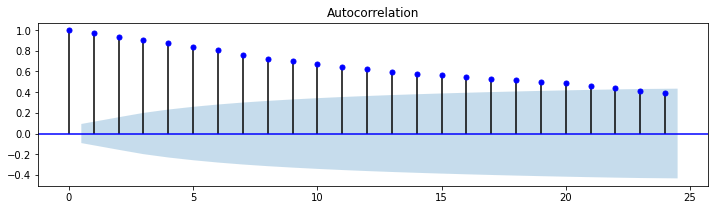

In [ ]:
acf_plot = plot_acf(trigo_ts, lags=24,  color= 'blue')
acf_plot.set_size_inches(12,3)

In [ ]:
# test DICKEY-FULLER
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(trigo_ts.trigo, regression='nc',autolag='AIC')

(-0.85762605176623,
 0.3464190232934138,
 8,
 441,
 {'1%': -2.5708284909065666,
  '10%': -1.616231391782543,
  '5%': -1.9416260087080306},
 3361.8032713653333)

In [ ]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(trigo_ts.trigo, regression='c',autolag='AIC')

(-2.574382351490407,
 0.09840834221178307,
 8,
 441,
 {'1%': -3.4452655826028318,
  '10%': -2.570272878944473,
  '5%': -2.868116205869215},
 3357.9123884352484)

In [ ]:
# Incluya ambos términos (“Trend”)
tsa.adfuller(trigo_ts.trigo, regression='ct',autolag='AIC')

(-2.9580081551660657,
 0.14420184515063683,
 8,
 441,
 {'1%': -3.979446309286507,
  '10%': -3.132933481411034,
  '5%': -3.420492546721216},
 3357.784083010919)

Ánalisis de la serie original diferenciada - TRIGO -

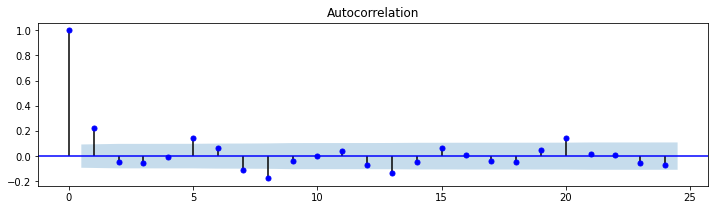

In [ ]:
acf_plot = plot_acf(trigo_ts_diff, lags=24,  color= 'blue')
acf_plot.set_size_inches(12,3)

In [ ]:
# test DICKEY-FULLER
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(trigo_ts_diff.trigo, regression='nc',autolag='AIC') 

(-8.354956120557224,
 5.0735942453695186e-14,
 7,
 441,
 {'1%': -2.5708284909065666,
  '10%': -1.616231391782543,
  '5%': -1.9416260087080306},
 3353.6737875815734)

In [ ]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(trigo_ts_diff.trigo, regression='c',autolag='AIC')

(-8.346129507545538,
 3.08200159864605e-13,
 7,
 441,
 {'1%': -3.4452655826028318,
  '10%': -2.570272878944473,
  '5%': -2.868116205869215},
 3355.6683225005977)

In [ ]:
# Incluya ambos términos (“Trend”)
tsa.adfuller(trigo_ts_diff.trigo, regression='ct',autolag='AIC')

(-8.333420555413669,
 1.2131363928091816e-11,
 7,
 441,
 {'1%': -3.979446309286507,
  '10%': -3.132933481411034,
  '5%': -3.420492546721216},
 3357.6679232346787)

# Serie cebada

Primero analizamos serie original - CEBADA -

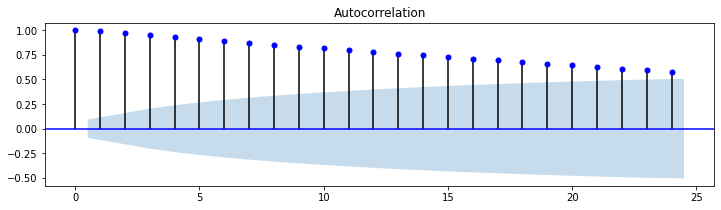

In [ ]:
acf_plot = plot_acf(cebada_ts, lags=24,  color= 'blue')
acf_plot.set_size_inches(12,3)

In [ ]:
# test DICKEY-FULLER
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(cebada_ts.cebada, regression='nc',autolag='AIC') 

(-0.5437923534785354,
 0.47804145229843087,
 1,
 448,
 {'1%': -2.5707486963887116,
  '10%': -1.6162403831708814,
  '5%': -1.941615972306499},
 2918.2053844443963)

In [ ]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(cebada_ts.cebada, regression='c',autolag='AIC')

(-2.1392501781073356,
 0.22902747988534805,
 1,
 448,
 {'1%': -3.4450311708077743,
  '10%': -2.570217924306441,
  '5%': -2.8680131035505023},
 2916.169247664343)

In [ ]:
# Incluya ambos términos (“Trend”)
tsa.adfuller(cebada_ts.cebada, regression='ct',autolag='AIC')

(-3.148128609621919,
 0.09524185611943115,
 1,
 448,
 {'1%': -3.9791209459359305,
  '10%': -3.1328412336343927,
  '5%': -3.420335526154187},
 2912.1236881710465)

Ánalisis de la serie original diferenciada - CEBADA -

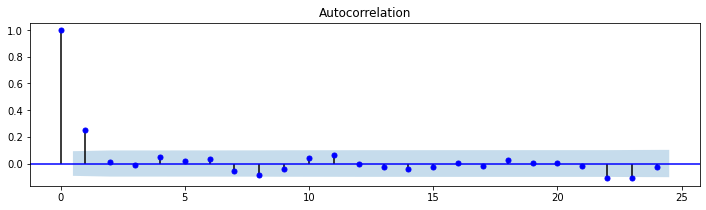

In [ ]:
acf_plot = plot_acf(cebada_ts_diff, lags=24,  color= 'blue')
acf_plot.set_size_inches(12,3)

In [ ]:
# test DICKEY-FULLER
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(cebada_ts_diff.cebada, regression='nc',autolag='AIC')

(-16.366606421426578,
 4.644271755843037e-28,
 0,
 448,
 {'1%': -2.5707486963887116,
  '10%': -1.6162403831708814,
  '5%': -1.941615972306499},
 2910.5404322989284)

In [ ]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(cebada_ts_diff.cebada, regression='c',autolag='AIC')

(-16.354713763538978,
 2.909398986151819e-29,
 0,
 448,
 {'1%': -3.4450311708077743,
  '10%': -2.570217924306441,
  '5%': -2.8680131035505023},
 2912.437592139488)

In [ ]:
# Incluya ambos términos (“Trend”)
tsa.adfuller(cebada_ts_diff.cebada, regression='ct',autolag='AIC')

(-16.336571681333343,
 0.0,
 0,
 448,
 {'1%': -3.9791209459359305,
  '10%': -3.1328412336343927,
  '5%': -3.420335526154187},
 2914.437468942544)

# Modelo VAR

In [ ]:
serieVAR=pd.concat([maiz_ts_diff, trigo_ts_diff, cebada_ts_diff], axis=1)

In [ ]:
serieVAR.head()

,maiz,trigo,cebada
indice_tiempo,,,
1980-02-01,8.661018,-2.939514,0.000000
1980-03-01,-4.330513,-9.185913,3.313298
1980-04-01,-1.574715,-6.981293,0.000000
1980-05-01,1.574715,4.776672,-1.656649
1980-06-01,3.543152,-3.674362,-3.313298


In [ ]:
# Separacion Train/Test

# Variable que guarda el porcentaje de train
split = .9

# Seleccion de train
train = serieVAR.iloc[:round(len(serieVAR)*split)]

# Seleccionamos de test
test = serieVAR.iloc[round(len(serieVAR)*split):]

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train,"\n\n", test)

                    maiz      trigo     cebada
indice_tiempo                                 
1980-02-01      8.661018  -2.939514   0.000000
1980-03-01     -4.330513  -9.185913   3.313298
1980-04-01     -1.574715  -6.981293   0.000000
1980-05-01      1.574715   4.776672  -1.656649
1980-06-01      3.543152  -3.674362  -3.313298
...                  ...        ...        ...
2013-05-01     15.022317  13.026574  -0.999377
2013-06-01      1.764859 -10.265621  -0.835719
2013-07-01    -18.129510  -9.441619  -8.470014
2013-08-01    -44.038716   1.436343 -27.378026
2013-09-01    -27.483040   0.951279 -19.924691

[404 rows x 3 columns] 

                     maiz      trigo     cebada
indice_tiempo                                 
2013-10-01     -5.680207  12.243653 -15.540935
2013-11-01     -2.590485 -12.890210  -2.940254
2013-12-01     -1.638616 -15.261064   0.012924
2014-01-01      1.218540 -15.621904   6.202309
2014-02-01     10.609191  14.547073   0.774812
2014-03-01     13.007051  32.8102

# Criterio de Granger

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
# P-valores menores al nivel de significancia (0.05) implica que la hipotesis nula (X no causa Y) puede rechazarse.
    
def grangers_causation_matrix(data, variables, maxlag, testgr='ssr_chi2test', verbose=False):    

    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [(test_result[i+1][0][testgr][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [ ]:
testgr = 'ssr_chi2test'
grangers_causation_matrix(train, variables = train.columns, maxlag=10) 

,maiz_x,trigo_x,cebada_x
maiz_y,1.000000e+00,4.766605e-07,0.010053
trigo_y,8.895450e-08,1.000000e+00,0.000021
cebada_y,7.761195e-10,1.018621e-08,1.000000


In [ ]:
# Funcion para evaluar el criterio de Akaike (AIC)

def seleccionar_p(model, a=1, b=201):
    a = 1
    b = 201
    p = np.arange(a, b)
    global p_minAIC
    p_minAIC = 1
    minAIC = 0

    aic = []

    for i in p:
        resultados_aic = model.fit(i)
        aic.append(resultados_aic.aic)
        #print(f'VAR con lag de orden {i}')
        #print('AIC {}'.format(resultados_aic.aic))
        #print('BIC {}'.format(resultados_aic.bic))
        #print()
        if (i == 1):
            minAIC = resultados_aic.aic
            p_minAIC = i
        elif (resultados_aic.aic < minAIC):
            minAIC = resultados_aic.aic
            p_minAIC = i

    print(f'p para menor AIC: {p_minAIC}')
    print(f'Menor AIC: {minAIC}')

    plt.figure(figsize=(12,3), dpi=100)
    plt.plot(list(np.arange(a,b,1)),aic)
    plt.xlabel("Orden")
    plt.ylabel("AIC")
    plt.show()
    return p_minAIC

In [ ]:
from statsmodels.tsa.api import VAR

In [ ]:
model = VAR(train)


In [ ]:
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  12.795717029571199
BIC :  12.91479206367383
FPE :  360670.105868036
HQIC:  12.842858402107796 

Lag Order = 2
AIC :  12.782671327106646
BIC :  12.991441212333013
FPE :  355998.5328405935
HQIC:  12.8653306678584 

Lag Order = 3
AIC :  12.762759375643569
BIC :  13.06155948242461
FPE :  348987.15802377707
HQIC:  12.88107646297369 

Lag Order = 4
AIC :  12.794057574700394
BIC :  13.183225368043422
FPE :  360096.11989197513
HQIC:  12.948173071480749 

Lag Order = 5
AIC :  12.7167429335785
BIC :  13.196617991249461
FPE :  333324.5846725086
HQIC:  12.90679839485544 

Lag Order = 6
AIC :  12.691583951503572
BIC :  13.262507982411142
FPE :  325071.9563139949
HQIC:  12.91772183224795 

Lag Order = 7
AIC :  12.661351548332904
BIC :  13.323668411117172
FPE :  315430.14545056067
HQIC:  12.92371521127539 

Lag Order = 8
AIC :  12.65796181676279
BIC :  13.41201753859129
FPE :  314414.1205437952
HQIC:  12.956695540315623 

Lag Order = 9
AIC :  12.616437596908206
BIC :  13.46258039

In [ ]:
#---------------------------------
# alterntative: auto fit
#---------------------------------
x = model.select_order(maxlags=70)
x.summary()

,AIC,BIC,FPE,HQIC
0,13.27,13.31,5.808e+05,13.29
1,13.09,13.23*,4.838e+05,13.14*
2,13.08,13.32,4.809e+05,13.18
3,13.05,13.40,4.670e+05,13.19
4,13.09,13.53,4.827e+05,13.26
5,12.98,13.53,4.356e+05,13.20
6,12.98,13.63,4.345e+05,13.24
7,12.95,13.70,4.198e+05,13.25
8,12.92,13.78,4.106e+05,13.27
9,12.88,13.84,3.944e+05,13.27


In [ ]:
model_fitted = model.fit(18)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 23, Jul, 2022
Time:                     15:12:37
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    14.1736
Nobs:                     386.000    HQIC:                   13.1532
Log likelihood:          -3887.28    FPE:                    265271.
AIC:                      12.4827    Det(Omega_mle):         177884.
--------------------------------------------------------------------
Results for equation maiz
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.177152         0.440995            0.402           0.688
L1.maiz            0.071773         0.064690            1.109           0.267
L1.trigo           0.095787         0.049179            1.948           0

Los residuos están correlacionados ( no son ceros!!! Son distitnso de cero!!)---IMPORTANTE!
Vemos que los residuos están correlacionados entre sí (no son cero) esto es importante ya que una variable afecta al comportamiento de la otra. 

In [ ]:
# from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [ ]:
## Funcion para realizar el test de cointegracion de Johanson
# def test_cointegracion(df, alpha=0.05): 
#    out = coint_johansen(df,-1,5)
#    d = {'0.90':0, '0.95':1, '0.99':2}
#    traces = out.lr1
#    cvts = out.cvt[:, d[str(1-alpha)]]
#    def adjust(val, length= 6): return str(val).ljust(length)
#
#    # Summary
#    print('Nombre :  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
#    for col, trace, cvt in zip(df.columns, traces, cvts):
#        print(adjust(col), ': ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [ ]:
## Test de Cointegracion
#test_cointegracion(train)

Prediccion

In [ ]:
# Funcion que recibe listas con las predicciones e intervalos de confianza de las 3 series y devuelve un
# dataframe para la serie indicada por la variable indice
def serializar(predicciones_, test_, indice, futuro_, intervalos=True):
    # predicciones_: las predecciones obetenidas por el modelo. Contiene 3 listas: las predicciones para cada una 
    #                de las 3 series, junto con 2 listas adicionales que corresponden a los intervalos inferiores
    #                y superiores de cada una de las 3 series.
    # test         : dataset de test. Se utiliza para extraer indices. Los indices de las predicciones tienen que
    #              : coincidir con los indices de tests. Las listas que contienen las predicciones no tienen indices
    #              : temporales, por eso se extraen de test.
    # indice       : variable que toma valores 1, 2 o 3. Se utiliza para referenciar a la serie en cuestion (serie1
    #                serie2, serie3)
    # futuro_      : indican cuantas unidades en tiempo (horas en el caso de las series seleccionadas)
    #                hacia adelante se quieren predecir.
    # intervalos   : flag que indica si los intervalos de confianza 
    serie = {
        "FECHA": test_.index[:futuro_],
        "serie"+str(indice): predicciones_[0][:,indice-1].tolist(),
        "serie"+str(indice)+"_inf": predicciones_[1][:,indice-1].tolist(),
        "serie"+str(indice)+"_sup": predicciones_[2][:,indice-1].tolist()}
    serie = pd.DataFrame(serie, columns=["FECHA", "serie"+str(indice), 
                                         "serie"+str(indice)+"_inf", "serie"+str(indice)+"_sup"])
    serie.set_index("FECHA", inplace=True)
    if (intervalos==False):
        serie.loc[serie["serie"+str(indice)+"_inf"] < 0, "serie"+str(indice)+"_inf"] = 0
        serie.loc[serie["serie"+str(indice)+"_sup"] < 0, "serie"+str(indice)+"_sup"] = 0
    return serie

In [ ]:
def graficar_pred(serie_test, serie_pred, titulo="Valores Originales vs Predicciones", 
                  xlabel="Fecha", ylabel="Valor", intervalos=True):
    # serie_test: la porcion de la serie con los datos de test
    # serie_pred: las predicciones hechas por el modelo
    
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])
      
    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.iloc[:,0].plot(label="Predicciones")
    if (intervalos==True):
        serie_pred.iloc[:,2].plot(label="Intervalo de Confianza Superior")
        serie_pred.iloc[:,1].plot(label="Intervalo de Confianza Inferior")
     
    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.5', dashes=(5,2,1,2))

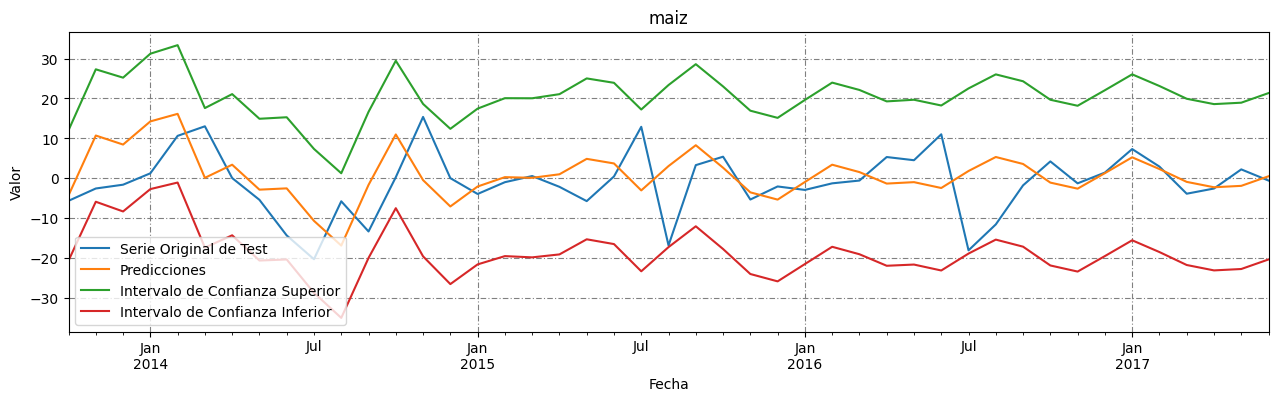

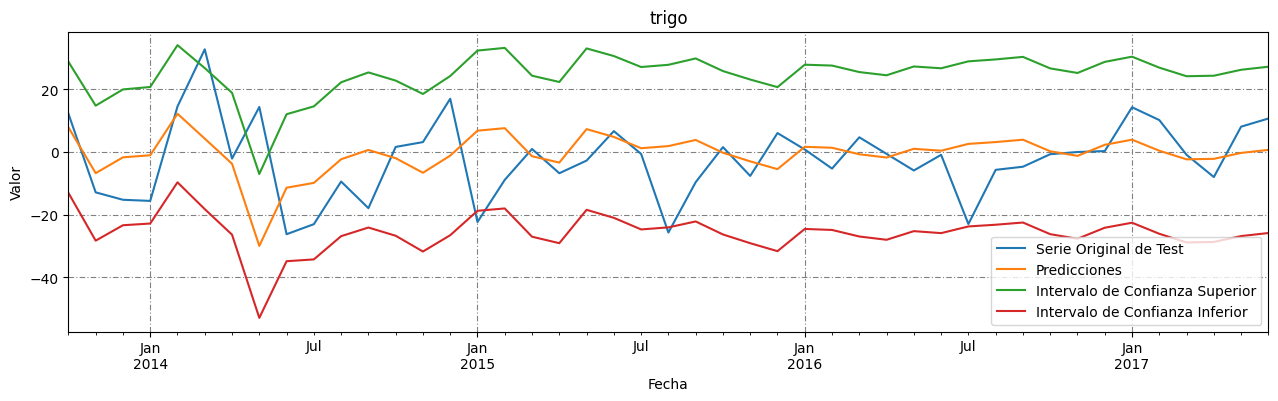

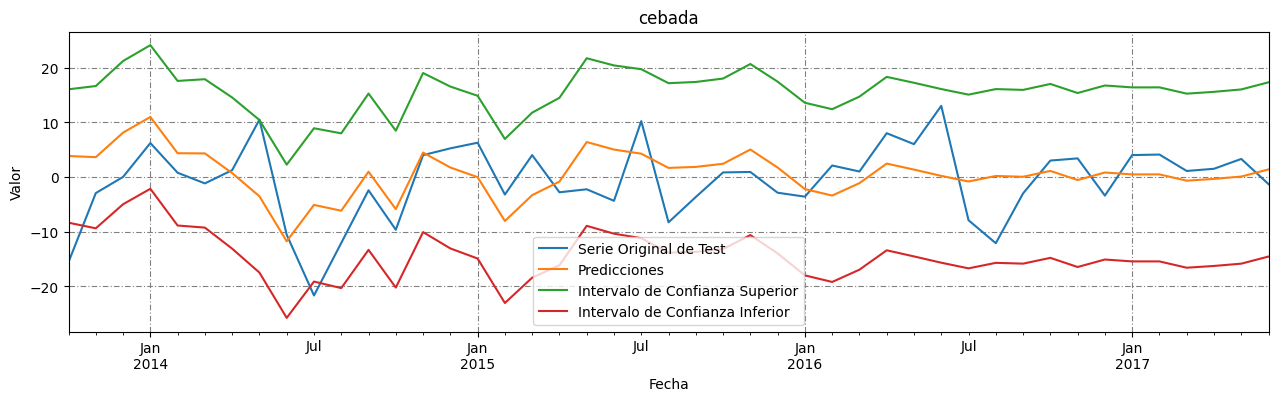

In [ ]:
# Con la variable futuro se indican cuantas unidades en tiempo
# hacia adelante se quieren predecir
futuro = 45
lag_orden = 18

predicciones = model_fitted.forecast_interval(train.values[-lag_orden:], steps=futuro)

df = list()
for i in [1, 2, 3]:
    df.append(serializar(predicciones, test, i, futuro))
    
for i, serie in enumerate(serieVAR):
    graficar_pred(test[serie][:futuro], df[i], titulo=serie)

In [ ]:
def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [ ]:
def test_residuos(residuos):


    # Test de Jarque Bera
    # H0: los datos estan distribuidos normalmente
    # Ha: los datos no estan distribuidos normalmente
    # Si p < 0.05 se rechaza la hipotesis nula
    jarquebera = jarque_bera(residuos)
    print('Jarque-Bera')
    print(f'p-valor: {jarquebera[1]}\n')
    
    # Test de Shapiro Wilks
    # H0: los datos estan distribuidos normalmente
    # Ha: los datos no estan distribuidos normalmente
    # Si p < 0.05 se rechaza la hipotesis nula
    shapir = shapiro(residuos)
    print('Shapiro')
    print(f'p-valor: {shapir[1]}\n')

In [ ]:
def evaluar_residuos(residuos):
    residuos.plot(title='Residuos', figsize=(12, 3))
    plt.axhline(0, linestyle='--', color='k')
    plt.show()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
    ax[0].set_title('Residuos KDE')
    ax[1].set_title('Q-Q Plot')    
    residuos.plot(kind='kde', ax=ax[0])
    probplot(residuos, dist='norm', plot=ax[1])
    plt.show()
    acf = plot_acf(residuos)
    acf.set_size_inches(12,3)
    plt.show()
    print('Descriptivo Residuos\n')
    print(f'{residuos.describe()}\n\n')
    print('Test sobre los Residuos\n')
    test_residuos(residuos)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import jarque_bera, shapiro, boxcox, probplot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_breusch_godfrey

MSE: 47.367274117316875
MAE: 5.519279225398781
RMSE: 6.8823886926936115
MAPE: 15.3079
Evaluacion de residuos de Serie 


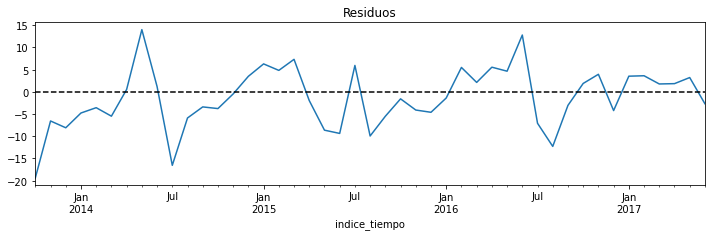

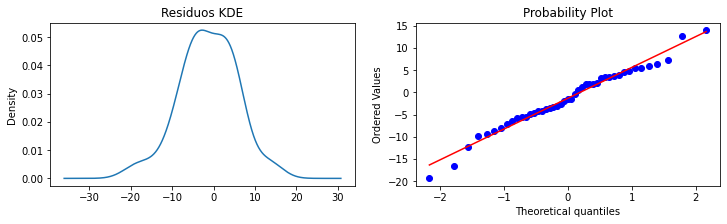

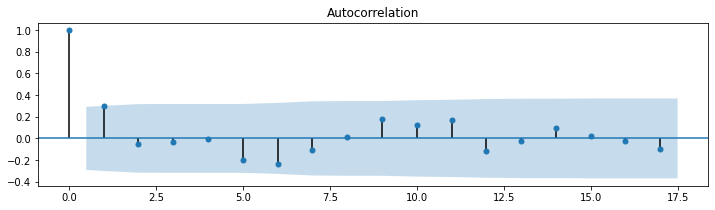

Descriptivo Residuos

count    45.000000
mean     -1.337186
std       6.827525
min     -19.376180
25%      -5.481023
50%      -1.576136
75%       3.527187
max      14.012558
dtype: float64


Test sobre los Residuos

Jarque-Bera
p-valor: 0.7173448838908651

Shapiro
p-valor: 0.6919693946838379



In [ ]:
evaluar_metricas(test[serie][:futuro], df[2].iloc[:,0])
print(f"Evaluacion de residuos de Serie ")
evaluar_residuos(test[serie][:futuro]-df[2].iloc[:,0])

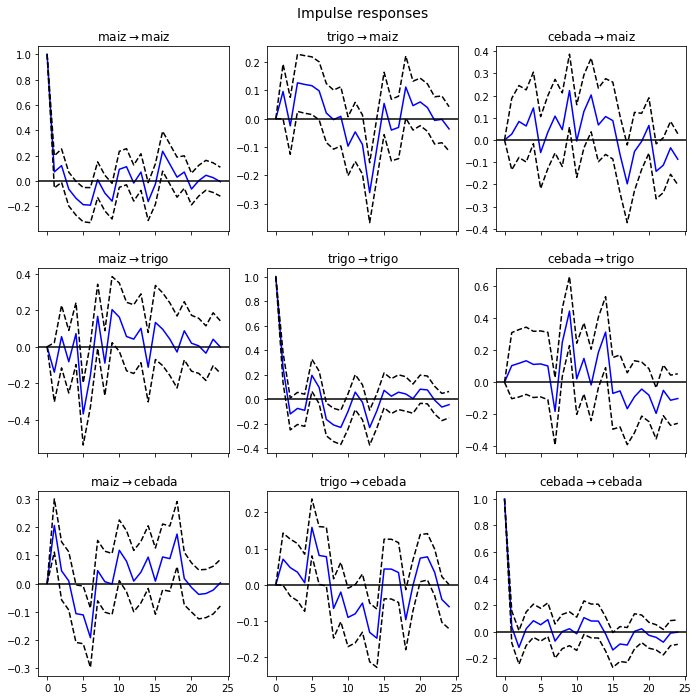

In [ ]:
model_fitted.irf(24).plot();